In [ ]:
## เตรียมเครื่องมือ
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.font_manager as fm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


font_url = "https://github.com/google/fonts/raw/main/ofl/kanit/Kanit-Regular.ttf"
font_filename = "Kanit-Regular.ttf"

if not os.path.exists(font_filename):
    print(f"กำลังดาวน์โหลดฟอนต์ {font_filename} ...")
    response = requests.get(font_url)
    with open(font_filename, 'wb') as f:
        f.write(response.content)
    print("ดาวน์โหลดเสร็จสิ้น!")
else:
    print(f"พบฟอนต์ {font_filename} ในเครื่องแล้ว ใช้งานต่อได้เลย")

fm.fontManager.addfont(font_filename)


plt.rc('font', family='Kanit')
plt.rc('font', size=12)
plt.rc('font', family='Kanit')

sns.set_theme(
    style="white", 
    font="Kanit",  # ระบุชื่อฟอนต์ที่นี่เลย!
    rc={"axes.unicode_minus": False}
)

พบฟอนต์ Kanit-Regular.ttf ในเครื่องแล้ว ใช้งานต่อได้เลย


In [3]:
## โหลดข้อมูล
df = pd.read_csv('insurance.csv')

## ตรวจสอบข้อมูลเบื้องต้น
# print(df.head())
# print(df.info())

## ตรวจสอบค่าว่าง
print("ตรวจสอบค่าว่างในแต่ละคอลัมน์:")
print(df.isnull().sum())

## ลบค่าว่าง
clean_df = df.dropna()

ตรวจสอบค่าว่างในแต่ละคอลัมน์:
age         1
sex         0
bmi         1
children    1
smoker      0
region      0
charges     0
dtype: int64


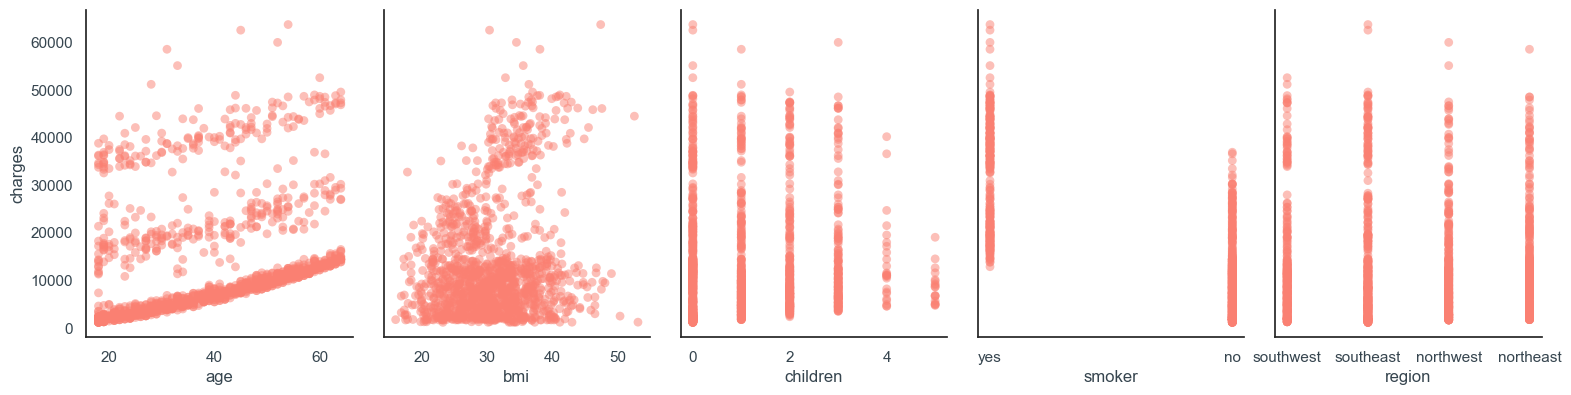

In [4]:

# รวบตัวแปรต้นที่ต้องการดูไว้ใน list
features = ['age', 'bmi', 'children', 'smoker', 'region']

# --- STEP 1: ตั้งค่า Theme หลักให้คลีนที่สุด ---
# style="white": เอาพื้นหลังสีเทาและเส้นกริดออก
# context="notebook": ปรับขนาดตัวอักษรให้พอดีกับการอ่านบนจอ
sns.set_theme(style="white", context="notebook")

# --- STEP 2: กำหนดสไตล์ของ "จุด" (Scatter Points) ---
# เราจะส่ง dict นี้เข้าไปใน parameter 'plot_kws'
minimal_point_style = {
    'color': 'salmon',    # ใช้สีเทาเข้ม (Charcoal) แทนสีน้ำเงินสดๆ
    'alpha': 0.5,          # ความโปร่งใส (0.0 - 1.0) สำคัญมาก ช่วยให้เห็นการกระจุกตัว
    's': 40,               # ขนาดของจุด (Size)
    'edgecolor': 'none'    # เอาขอบสีขาวรอบๆ จุดออก ให้ดูเนียนตา
}

# --- STEP 3: สร้างกราฟ ---
g = sns.pairplot(data=clean_df, 
                 x_vars=features, 
                 y_vars='charges', 
                 height=4, 
                 aspect=0.8, 
                 kind='scatter',
                 plot_kws=minimal_point_style) # <-- ใส่สไตล์จุดตรงนี้

# --- STEP 4 (Optional): เก็บงานละเอียด ---
# ลบเส้นแกนด้านบนและด้านขวาออก (Despine) เพื่อความมินิมอลขั้นสุด
sns.despine(top=True, right=True)

# ปรับสีตัวหนังสือให้เป็นสีเทาเข้มแทนสีดำสนิท (ดูนุ่มนวลขึ้น)
plt.setp(g.fig.findobj(match=plt.Text), color='#36454F')
plt.setp(g.fig.findobj(match=plt.Line2D), color='#36454F') # ปรับสีเส้นแกน

plt.show()

MAE: 4208.141168796519, MSE: 35422671.59173867, R2: 0.76247732704497


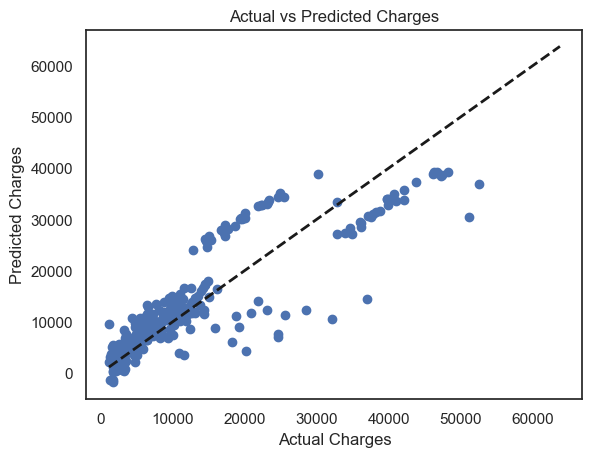

In [ ]:
## split ข้อมูลเป็น features และ target
X = clean_df.drop('charges', axis=1)
y = clean_df['charges']

## แปลงข้อมูลเชิงหมวดหมู่เป็นตัวเลข (ถ้ามี)
X = pd.get_dummies(X, drop_first=True)

## แบ่งข้อมูลเป็นชุดฝึกสอนและทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

## สร้างโมเดลการถดถอยเชิงเส้น
model = LinearRegression()
model.fit(X_train, y_train)

## ทดสอบโมเดล
y_pred = model.predict(X_test)
y_actual = y_test.values
# print("Predictions:", y_pred)

## ประเมินผลโมเดล
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

## แสดงกราฟเปรียบเทียบค่าจริงกับค่าทำนาย
# 1. แปลงข้อมูล X_train ให้เป็นตัวเลขทศนิยม (float) ทั้งหมดก่อน
# เพื่อแก้ปัญหา True/False หรือ Object ที่หลงเหลืออยู่
X_train_numeric = X_train.astype(float) 
Y_train_numeric = y_train.astype(float)

# 2. ต้องบวกค่าคงที่ (Constant) เข้าไปเอง
X_train_sm = sm.add_constant(X_train_numeric)

# 3. สร้างโมเดลแบบ OLS
ols_model = sm.OLS(Y_train_numeric, X_train_sm).fit()

# 4. ปริ้นตารางสรุปผล
print(ols_model.summary())

In [ ]:



# 1. แปลงข้อมูล X_train ให้เป็นตัวเลขทศนิยม (float) ทั้งหมดก่อน
# เพื่อแก้ปัญหา True/False หรือ Object ที่หลงเหลืออยู่
X_train_numeric = X_train.astype(float) 
Y_train_numeric = y_train.astype(float)

# 2. ต้องบวกค่าคงที่ (Constant) เข้าไปเอง
X_train_sm = sm.add_constant(X_train_numeric)

# 3. สร้างโมเดลแบบ OLS
ols_model = sm.OLS(Y_train_numeric, X_train_sm).fit()

# 4. ปริ้นตารางสรุปผล
print(ols_model.summary())

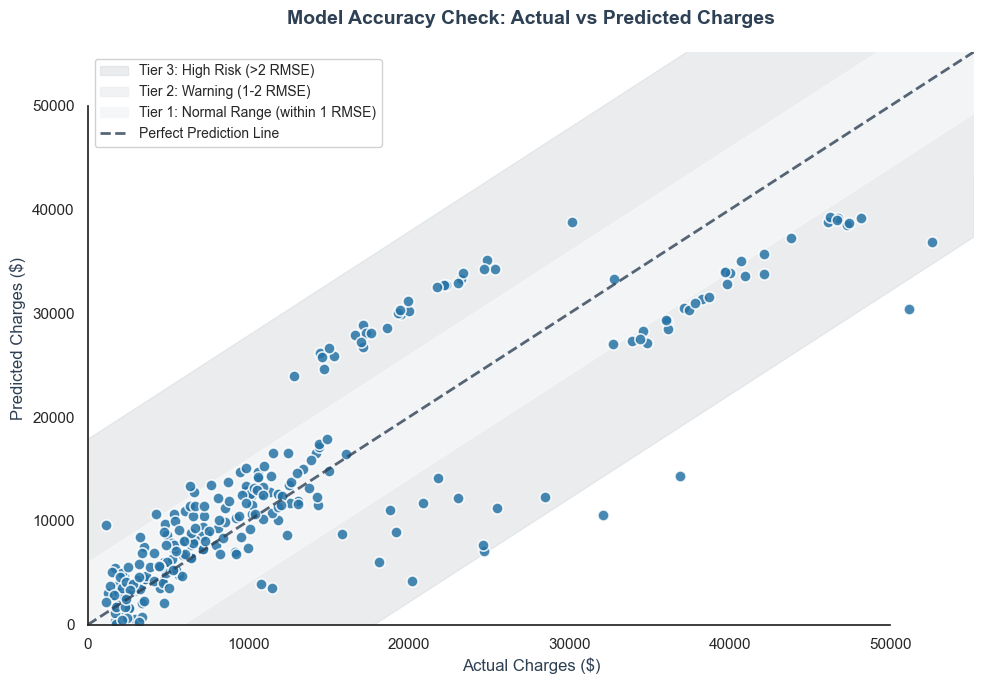

In [11]:
## วาดกราฟ Scatter พร้อมเส้น Identity และ Error Band
# 1. คำนวณ RMSE
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

# 2. วาดเส้น Identity (เส้นตรงกลาง)
max_val = max(y_actual.max(), y_pred.max())

# วาด Scatter และเส้นหลัก
sns.set_theme(style="white")

# --- MONOTONE COLOR PALETTE (Clean & Professional) ---
# ใช้โทนเทาที่ไล่ระดับความเข้ม เพื่อโชว์ความห่างจากเส้นหลัก
color_tier1 = '#F4F6F7' # Lightest Grey (เป๊ะมาก)
color_tier2 = '#EBEDEF' # Light Grey (เริ่มคลาดเคลื่อน)
color_tier3 = '#D6DBDF' # Muted Grey (คลาดเคลื่อนสูง)
line_color  = '#2E4053' # Darker Blue-Grey for line

# จุดข้อมูล (ใช้สีเดียวที่เด่นออกมา)
point_color_clear = '#2E86C1' # Deep Blue (ดูน่าเชื่อถือ)

# *** จุดที่ปรับแก้เพื่อให้ชัดขึ้น ***
point_color_clear = '#2874A6' # ใช้สีน้ำเงินที่เข้มขึ้น และสดกว่าพาสเทลเดิม
point_alpha = 0.85            # เพิ่มความทึบ (จากเดิมอาจจะ 0.6)
point_edge_width = 1.2        # เพิ่มขอบขาวให้หนาขึ้น (จากเดิม 0.5)
point_size = 65               # เพิ่มขนาดจุดเล็กน้อย

plt.figure(figsize=(10, 7))

# --- STEP 1: Draw Bands first (so they are in the background) ---
max_val = max(y_actual.max(), y_pred.max()) * 1.05 # เผื่อพื้นที่นิดหน่อย

# Tier 3 (Wide/Red)
plt.fill_between([0, max_val], [0 - 3*rmse, max_val - 3*rmse], [0 + 3*rmse, max_val + 3*rmse],
                 color=color_tier3, alpha=0.5, label='Tier 3: High Risk (>2 RMSE)')
# Tier 2 (Medium/Yellow)
plt.fill_between([0, max_val], [0 - 2*rmse, max_val - 2*rmse], [0 + 2*rmse, max_val + 2*rmse],
                 color=color_tier2, alpha=0.7, label='Tier 2: Warning (1-2 RMSE)')
# Tier 1 (Narrow/Green)
plt.fill_between([0, max_val], [0 - 1*rmse, max_val - 1*rmse], [0 + 1*rmse, max_val + 1*rmse],
                 color=color_tier1, alpha=0.9, label='Tier 1: Normal Range (within 1 RMSE)')

# --- STEP 2: Draw Identity Line ---
plt.plot([0, max_val], [0, max_val], color=line_color, linestyle='--', linewidth=2, alpha=0.8, label='Perfect Prediction Line')

# --- STEP 3: Draw Scatter Points (ON TOP & CLEARER) ---
sns.scatterplot(x=y_actual, y=y_pred,
                color=point_color_clear,
                alpha=point_alpha,
                s=point_size,
                edgecolor='white',       # ขอบขาวสำคัญมาก ช่วยให้เด้ง
                linewidth=point_edge_width) # ขอบหนาขึ้น

# --- FINAL TOUCHES ---
plt.title('Model Accuracy Check: Actual vs Predicted Charges', fontsize=14, pad=20, color=line_color, fontweight='bold')
plt.xlabel('Actual Charges ($)', fontsize=12, color=line_color)
plt.ylabel('Predicted Charges ($)', fontsize=12, color=line_color)

# Adjust axes limits to start from 0 for clarity
plt.xlim(0, max_val)
plt.ylim(0, max_val)

# Clean Legend
plt.legend(frameon=True, framealpha=0.9, facecolor='white', loc='upper left', fontsize=10)

# Minimalist spine
sns.despine(trim=True)

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     392.9
Date:                Sat, 03 Jan 2026   Prob (F-statistic):          1.15e-310
Time:                        10:40:26   Log-Likelihood:                -10817.
No. Observations:                1068   AIC:                         2.165e+04
Df Residuals:                    1059   BIC:                         2.170e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.087e+04   1127.528  

--- ปัจจัยที่ส่งผลต่อค่ารักษาพยาบาล (เรียงตามลำดับ) ---
            Feature        Impact
4        smoker_yes  23996.305812
2          children    463.438859
1               bmi    321.480641
0               age    252.464973
3          sex_male   -168.192251
5  region_northwest   -744.403639
6  region_southeast   -998.570281
7  region_southwest  -1776.239011
--------------------------------------------------


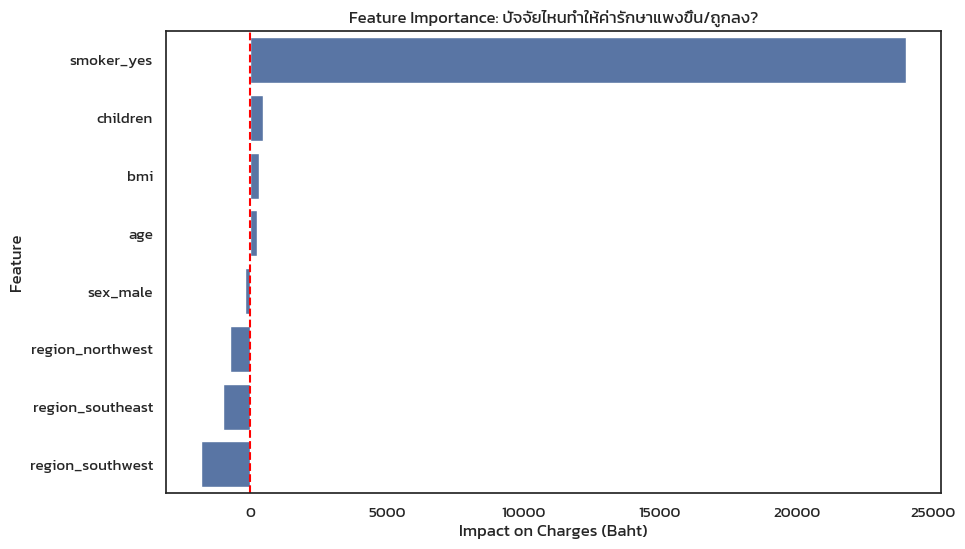

In [10]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,      # ชื่อตัวแปร
    'Impact': model.coef_            # ค่าสัมประสิทธิ์ (ผลกระทบที่เป็นตัวเงิน)
})

# 2. เรียงลำดับจากมากไปน้อย จะได้ดูง่ายๆ
coef_df = coef_df.sort_values(by='Impact', ascending=False)

# 3. แสดงผลเป็นตารางตัวเลข
print("--- ปัจจัยที่ส่งผลต่อค่ารักษาพยาบาล (เรียงตามลำดับ) ---")
print(coef_df)
print("-" * 50)

# 4. พล็อตกราฟแท่งโชว์เลย
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Impact', y='Feature')

plt.title('Feature Importance: ปัจจัยไหนทำให้ค่ารักษาแพงขึ้น/ถูกลง?')
plt.xlabel('Impact on Charges (Baht)')
plt.axvline(x=0, color='red', linestyle='--') # ขีดเส้นแบ่งแดนบวก/ลบ
plt.show()